In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
import matplotlib.animation as animation

In [4]:
%matplotlib inline

In [5]:
def forward_diff(U_0, h, k, m, v):
    """
    U0 (ndarray): initial condition u(0,x)
    h (float): x finite difference
    k (float): finite time difference
    m (int): num time steps
    v (float): constant from the diff equation
    """
    # get the num of x steps
    n = len(U_0)
    
    # initialize the U matrix and lambda
    U = np.zeros((m,n))
    U[0,:] = U_0
    U[:,0] = U_0[0]
    U[:,-1] = U_0[-1]
    lamda = v*k / h**2
    
    # Use formula to get each time step
    for j in range(0,m-1):
        # U[j+1,i] = U[j, i] + lambda(U[j,i+1] -2U[j,i] + U[j, i-1])
        U[j+1,1:-1] =  lamda*U[j,0:-2] + (1-2*lamda)*U[j,1:-1] + lamda*U[j,2:]
    return U

# Problem 1

Consider the initial/boundary value problem

\begin{align}
	\begin{split}
	&{ } u_t = .05 u_{xx}, \quad x \in [0,1], \quad t \in [0,1]\\
	&{ } u(0,t) = 0,\quad u(1,t) = 0,\\
	&{ } u(x,0) = 2\max\{.2 - |x-.5|,0\}.
	\end{split}
\end{align}

Approximate the solution $u(x,t)$ at time $t = .4$ by taking 6 subintervals in the $x$ dimension and 10 subintervals in time.

In [6]:
def animate(X, U, title):
    # turn off display while rendering
    plt.ioff()    
    n = U.shape[0] 
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_xlim((-12, 12))
    ax.set_ylim((-.1, 1))    
    # create the lines for the heat distribution
    solution, = plt.plot([], [], color='b', label='solution')    
    def update(i):
        # At each frame update the plot
        solution.set_data(X, U[i,:])        
        return solution    
    
    # here we plot and animate the plot
    plt.legend()
    animation.writer = animation.writers['ffmpeg']
    plt.title('Animation of solutions to the Heat Equation')
    ani = animation.FuncAnimation(fig, update, frames=range(n), interval=100)
    ani.save(f'{title}.mp4')
    plt.ion()
    plt.close()

(-0.1, 0.5)

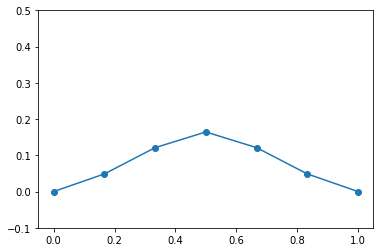

In [7]:
# initialize the parameters
x0, x1 = 0, 1
t0, t1 = 0 ,1
v = 0.05
n = 6
m = 10
h = (x1 - x0) / n
k = (t1 - t0) / m
# A = generate_A(k, h, v)

# Initial conditions
U_0 = [2 * max(0.2 - np.abs(x - 0.5), 0) for x in np.linspace(0, 1, 7)]

U = forward_diff(U_0, h, k, m, v)

plt.plot(np.linspace(0, 1, 7), U[4, :], "o-")
plt.ylim((-0.1, 0.5))

# Problem 2

Solve the initial/boundary value problem

\begin{align}
	\begin{split}
	&{ } u_t = u_{xx}, \quad x \in [-12,12],\quad t \in [0,1], \\
	&{ } u(-12,t) = 0,\quad u(12,t) = 0,\\
	&{ } u(x,0) = \max\{1 - x^2,0\}
	\end{split}
\end{align}

using the first order explicit method (1.1).
Use 140 subintervals in the $x$ dimension and 70 subintervals in time.
The initial and final states are shown in Figures 1 and 2.
Animate your results.

Explicit methods usually have a stability condition, called a CFL condition (for Courant-Friedrichs-Lewy).
For method (1.1) the CFL condition that must be satisfied is that:

$$\lambda \leq \frac{1}{2}$$

Repeat your computations using 140 subintervals in the $x$ dimension and 66 subintervals in time. Animate the results.
For these values the CFL condition is broken; you should easily see the result of this instability in the approximation $U^{66}$.


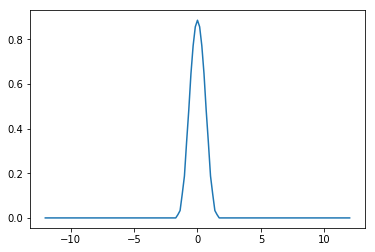

In [8]:
# Set up initial conditions
x0, x1 = -12, 12
t0, t1 = 0 ,1
v = 1
n = 140
m = 70
h = (x1 - x0) / n
k = (t1 - t0) / m
# A = generate_A(k, h, v)

# Initial conditions
U_0 = [max(1 - x**2, 0) for x in np.linspace(x0, x1, n+1)]
U = forward_diff(U_0, h, k, m, v)

title = 'heat_equation1'
X = np.linspace(x0, x1, n+1)
animate(X, U, title)

plt.plot(np.linspace(x0, x1, n+1), U[4, :])

`<video src="heat_equation1.mp4" controls>`

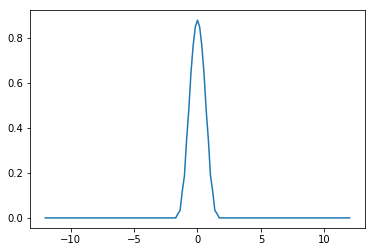

In [9]:
# Set up initial conditions
x0, x1 = -12, 12
t0, t1 = 0 ,1
v = 1
n = 140
m = 66
h = (x1 - x0) / n
k = (t1 - t0) / m
# A = generate_A(k, h, v)

# Initial conditions
U_0 = [max(1 - x**2, 0) for x in np.linspace(x0, x1, n+1)]
U = forward_diff(U_0, h, k, m, v)

title = 'heat_equation2'
X = np.linspace(x0, x1, n+1)
animate(X, U, title)

plt.plot(np.linspace(x0, x1, n+1), U[4, :])

`<video src="heat_equation2.mp4" controls>`

# Problem 3

Using the Crank Nicolson method, numerically approximate the solution $u(x,t)$ of the problem

\begin{align}
	\begin{split}
	&{ } u_t = u_{xx}, \quad x \in [-12,12],\quad t \in [0,1],\\
	&{ } u(-12,t) = 0,\quad u(12,t) = 0,\\
	&{ } u(x,0) = \max\{1 - x^2,0\}.
	\end{split}
\end{align}

Demonstrate that the numerical approximation at $t = 1$ converges to  $u(x,t=1)$.
Do this by computing $U$ at $t=1$ using $20,40,80,160,320$, and $640$ steps.
Use the same number of steps in both time and space.
Reproduce the loglog plot shown in Figure 4.
The slope of the line there shows the proper rate of convergence.

To measure the error, use the solution with the smallest $h$ (largest number of intervals) as if it were the exact solution, then sample each solution only at the x-values that are represented in the solution with the largest $h$ (smallest number of intervals).
Use the $\infty$-norm on the arrays of values at those points to measure the error.

Notice that, since the Crank-Nicolson method is unconditionally stable, there is no CFL condition and we can use the same number of intervals in time and space.

In [92]:
def heat_cn(v,f,xbounds,tbounds,xsteps,tsteps):
    """Computes the Crank-Nicholson solution to the heat equation initial/boundary
    value problem:
    
        u_t = νu_xx, x∈[x0,x1]
 t∈[t0,t1]
        u(x0,t) = 0, u(x1,t) = 0
        u(x,0) = f(x)
    """
    n, m = xsteps, tsteps
    h = (xbounds[1] - xbounds[0]) / n
    k = (tbounds[1] - tbounds[0]) / m
    
    # Initialize empty solution matrix
    U = np.zeros((n+1,m+1))
    
    # Initial conditions
    U_0 = [f(x) for x in np.linspace(xbounds[0], xbounds[1], n+1)]
    U[0] = U_0
    U[0,0] = 0
    U[0,-1] = 0
    lamda = k / (2*h**2)
    
    # Matricies needed for formula
    A = np.zeros((n+1,n+1))
    B = np.zeros((n+1,n+1))
    A[0,0], A[-1,-1], B[0,0], B[-1,-1] = 1,1,1,1
    for i in range(1, n):
        A[i,i-1:i+2] = lamda, 1 - 2*lamda, lamda
        B[i,i-1:i+2] = -lamda, 1 + 2*lamda, -lamda
    
    B_inv = np.linalg.inv(B)
    
    # Solve for each time step solution
    for i in range(m):
        U[i+1] = B_inv @ A @ U[i]
        
    return U

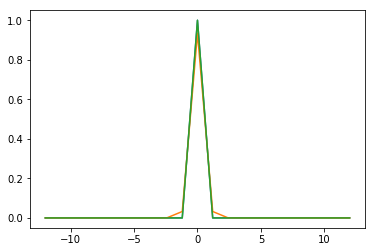

In [91]:
f = lambda x : max(1 - x**2, 0)
U = heat_cn(1, f, [-12, 12], [0, 1], 20, 20)
plt.plot(np.linspace(-12, 12, 21), U[0,:])
plt.plot(np.linspace(-12, 12, 21), U[1,:])

# initialize the parameters
v = 1
x0 = -12
x1 = 12
t0 = 0
t1 = 1
tsteps = np.logspace(1,6,6, base=2).astype(int)*10
xsteps = np.logspace(1,6,6, base=2).astype(int)*10

# make the initial condition function
def f(x):
    return max(1 - x**2, 0)

# store each solution for different values of t and x steps
sols = np.array([None]*len(tsteps))
for i in range(len(tsteps)):
    sols[i] = heat_cn(v, f, (x0,x1), (t0,t1), xsteps[i], tsteps[i])
    
plt.plot(np.linspace(-12, 12, 21), sols[0][0,:])

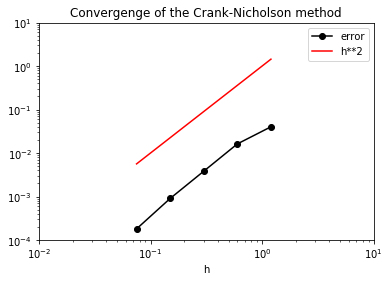

In [96]:
# "exact" solution as a baseline
exact = sols[-1][-1]

# store and extract the t=1 solutions
t1_sols = np.array([None]*len(tsteps))
for i, sol in enumerate(sols):
    t1_sols[i] = sol[-1]

# compute errors
error = np.zeros_like(t1_sols)
errors = np.zeros(len(tsteps))
for i in range(len(tsteps)):
    error[i] = exact[::2**(5-i)] - t1_sols[i]
for i, err in enumerate(error):
    errors[i] = np.linalg.norm(err, np.inf)
    
# plot the errors
h_vals = np.array([24 / i for i in xsteps])
plt.loglog(h_vals[:-1], errors[:-1], '-ok', label='error')
plt.xlim((10e-3,10))
plt.ylim((10e-5,10))
plt.loglog(h_vals[:-1], np.multiply(h_vals[:-1],h_vals[:-1]), 'r', label='h**2')
plt.legend()
plt.title('Convergenge of the Crank-Nicholson method')
plt.xlabel("h")
plt.show()